In [1]:
import os,sys
from importlib import reload
import numpy as np
import pandas as pd
from Bio.Seq import reverse_complement
#import torch
print(os.getpid())
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/')

from ChromAn.src.library_tools.primers import load_fasta_to_DataFrame
import MERFISH_probe_design.probe_design.OTTable_dict as ot


2115546


In [3]:
pool_folder = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites'
print(pool_folder)
library_folder = os.path.join(pool_folder, 'Edits_MERFISHmax')
print(library_folder)
if not os.path.exists(library_folder):
    os.makedirs(library_folder)

/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites
/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/Edits_MERFISHmax


In [5]:
edit_probes = pd.read_excel(os.path.join(library_folder, '2023_5_16_24edits_probes.xlsx'))
edit_probe_primers = pd.read_excel(os.path.join(library_folder, '2023_5_18_primers.xlsx'))

In [6]:
edit_probes

,Old Name,Name,Targeting Sequence,Readout Name,Readout Sequence,Probe Name,Probe Sequence
0,HEK3_mod_BC7_GATAG,Position1_HEK3_BC1_CTATC,GCCAAGTCTATCCGTGCTCA,R25__NDB_643,CGAACGACCTGTTACCTTGC,fwd_W1B09_primer_20_target_Position1_HEK3_BC1_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTCTATCCGTGCTCAtaCG...
1,HEK3_mod_BC4_AATCG,Position2_HEK3_BC2_CGATT,GCCAAGTCGATTCGTGCTCA,R26__NDB_683,ACCGCGTCCGCAGAGCAAAC,fwd_W1B09_primer_20_target_Position2_HEK3_BC2_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTCGATTCGTGCTCAtaAC...
2,HEK3_mod_BC16_GCAAG,Position3_HEK3_BC3_CTTGC,GCCAAGTCTTGCCGTGCTCA,R27__NDB_456,TGTTCGAATCCGCCTTCAAC,fwd_W1B09_primer_20_target_Position3_HEK3_BC3_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTCTTGCCGTGCTCAtaTG...
3,HEK3_mod_BC11_GCGCC,Position4_HEK3_BC4_GGCGC,GCCAAGTGGCGCCGTGCTCA,R28__NDB_760,GTTAGATGGCCGCTCGGGTT,fwd_W1B09_primer_20_target_Position4_HEK3_BC4_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTGGCGCCGTGCTCAtaGT...
4,HEK3_mod_BC12_CTTTG,Position5_HEK3_BC5_CAAAG,GCCAAGTCAAAGCGTGCTCA,R29__NDB_815,TTGCACGCAGCGATTGACGC,fwd_W1B09_primer_20_target_Position5_HEK3_BC5_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTCAAAGCGTGCTCAtaTT...
5,HEK3_mod_BC14_ATCAA,Position6_HEK3_BC6_TTGAT,GCCAAGTTTGATCGTGCTCA,R30__NDB_738,ATCAGGTTTACGCCCATGTC,fwd_W1B09_primer_20_target_Position6_HEK3_BC6_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTTTGATCGTGCTCAtaAT...
6,HEK3_mod_BC20_CTCTC,Position7_HEK3_BC7_GAGAG,GCCAAGTGAGAGCGTGCTCA,R31__NDB_400,TAGCGCCTGAATTAGCTATA,fwd_W1B09_primer_20_target_Position7_HEK3_BC7_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTGAGAGCGTGCTCAtaTA...
7,HEK3_mod_BC5_ATTTA,Position8_HEK3_BC8_TAAAT,GCCAAGTTAAATCGTGCTCA,R32__NDB_965,ATCCGGCGCGCGAGACTAAG,fwd_W1B09_primer_20_target_Position8_HEK3_BC8_...,TAGGCGTGTCGGCCAACCAGtaGCCAAGTTAAATCGTGCTCAtaAT...
8,EMX1_mod_BC2_GGACA,Position9_EMX1_BC1_TGTCC,ATGGGAGTGTCCTTCTTCTG,R33__NDB_750,ATGCGAACCGTCTCAAAGCA,fwd_W1B09_primer_20_target_Position9_EMX1_BC1_...,TAGGCGTGTCGGCCAACCAGtaATGGGAGTGTCCTTCTTCTGtaAT...
9,EMX1_mod_BC20_ACAAT,Position10_EMX1_BC2_ATTGT,ATGGGAGATTGTTTCTTCTG,R34__NDB_790,GGTGTCGGTTAAATATTCCT,fwd_W1B09_primer_20_target_Position10_EMX1_BC2...,TAGGCGTGTCGGCCAACCAGtaATGGGAGATTGTTTCTTCTGtaGG...


In [17]:
primer_folder = r'/lab/solexa_weissman/puzheng/References/Primers'
# fwd
forward_primers = load_fasta_to_DataFrame(os.path.join(primer_folder, 'forward_primers_keep.fasta'))
reverse_primers = load_fasta_to_DataFrame(os.path.join(primer_folder, 'reverse_primers_keep.fasta'))

In [7]:
edit_probe_primers

,Name,Sequence,Scale,Purification
0,W1B09_primer_20,TAGGCGTGTCGGCCAACCAG,25nm,STD
1,W1B10_primer_21,TAATACGACTCACTATAGGGCGGGTCGATCATCGGCTTTG,25nm,STD


In [8]:
readout_folder = r'/lab/solexa_weissman/puzheng/References/Readouts'
readout_filename = os.path.join(readout_folder, 'perturbfish_bits_4base_extended.csv')
readout_df = pd.read_csv(readout_filename)
readout_df


,Name,Seq tail,Description,Reverse Complement,short_name,Seq_15mer_Tm45,Seq_15mer_Tm45_RC
0,R1__NDB_784,TAGAAATATCCGAGTGGCAT,MERFISH,ATGCCACTCGGATATTTCTA,R1,AATATCCGAGTGGCA,TGCCACTCGGATATT
1,R2__NDB_755,TGCGACATGTTATGCTAGGC,MERFISH,GCCTAGCATAACATGTCGCA,R2,TGCGACATGTTATGC,GCATAACATGTCGCA
2,R3__NDB_759,TGACTGTCGTTGACTCTCGG,MERFISH,CCGAGAGTCAACGACAGTCA,R3,TGTCGTTGACTCTCG,CGAGAGTCAACGACA
3,R4__NDB_826,ATATGTCGATGTCCTTAGAC,MERFISH,GTCTAAGGACATCGACATAT,R4,TGTCGATGTCCTTAG,CTAAGGACATCGACA
4,R5__NDB_578,AGGCGATACATGAGAGGCGT,MERFISH,ACGCCTCTCATGTATCGCCT,R5,AGGCGATACATGAGA,TCTCATGTATCGCCT
...,...,...,...,...,...,...,...
189,R190__NDB_941,GCAATAGCGGCACCTTTCAC,Extra,GTGAAAGGTGCCGCTATTGC,R190,AATAGCGGCACCTTT,AAAGGTGCCGCTATT
190,R191__NDB_846,GGCTATTAGTCGGTCTGATA,Extra,TATCAGACCGACTAATAGCC,R191,GGCTATTAGTCGGTC,GACCGACTAATAGCC
191,R192__NDB_775,GTTACTCGACCCGCGTGCAA,Extra,TTGCACGCGGGTCGAGTAAC,R192,GTTACTCGACCCGCG,CGCGGGTCGAGTAAC
192,R193__NDB_439,TCTCGTAGAGATCCTCACCG,Extra,CGGTGAGGATCTCTACGAGA,R193,CGTAGAGATCCTCAC,GTGAGGATCTCTACG


In [9]:
# select readouts
sel_readouts = pd.DataFrame({'Name':readout_df['Name'].values[24:24+27], 'Sequence':readout_df['Seq tail'][24:24+27].values})
sel_readouts # these are the sequences in the probes

,Name,Sequence
0,R25__NDB_643,CGAACGACCTGTTACCTTGC
1,R26__NDB_683,ACCGCGTCCGCAGAGCAAAC
2,R27__NDB_456,TGTTCGAATCCGCCTTCAAC
3,R28__NDB_760,GTTAGATGGCCGCTCGGGTT
4,R29__NDB_815,TTGCACGCAGCGATTGACGC
5,R30__NDB_738,ATCAGGTTTACGCCCATGTC
6,R31__NDB_400,TAGCGCCTGAATTAGCTATA
7,R32__NDB_965,ATCCGGCGCGCGAGACTAAG
8,R33__NDB_750,ATGCGAACCGTCTCAAAGCA
9,R34__NDB_790,GGTGTCGGTTAAATATTCCT


In [10]:
# Load edit sites:
edit_probe_filename = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/PL70-76_amplifier_pools_bits_pegfish_2lvl.xlsx'

edit_probes = pd.read_excel(edit_probe_filename)
site_2_probes = {}
sel_pool_names = ['PL72_emx1_bit_350', 'PL73_hek3_bit_350', 'PL74_rnf2_bit_350']
for _pool_name in sel_pool_names:
    _site = _pool_name.split('_')[1].upper()
    _probes = edit_probes.loc[edit_probes['Pool name'] == _pool_name].reset_index()
    site_2_probes[_site] = _probes

In [13]:
## New way:
import re

sel_probe_filename = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/Edits/Mapping_new_old_bits.xlsx'
sel_probe_names = pd.read_excel(sel_probe_filename)

In [14]:
edit_target_seq_df = {
    'Old Name':[],
    'Name':[],
    "Targeting Sequence":[],
}

for _i, _row in sel_probe_names.iterrows():
    _old_name = _row['Old Name']
    _new_name = _row['New Name']
    match = re.match(r'([A-Z0-9]+)_mod_BC([0-9]+)_([ATCG]+)', _old_name, )
    _site, _ind, _edit_seq = match.groups()
    # get probe
    _probe = site_2_probes[_site].loc[int(_ind)-1, 'Sequence']
    #print(_old_name, _new_name)
    #print(reverse_complement(_edit_seq))
    #print(_probe[25:45])
    # append
    edit_target_seq_df['Old Name'].append(_old_name)
    edit_target_seq_df['Name'].append(_new_name)
    edit_target_seq_df['Targeting Sequence'].append(_probe[25:45])
    #break
# append unedited
for _site, _probes in site_2_probes.items():
    _old_name = f"{_site}_unedited"
    _new_name = f"Position0_{_site}_unedited"
    _tar_seq = _probes.loc[20, 'Sequence'][25:45]
    # append
    edit_target_seq_df['Old Name'].append(_old_name)
    edit_target_seq_df['Name'].append(_new_name)
    edit_target_seq_df['Targeting Sequence'].append(_tar_seq)

# 
edit_target_seq_df = pd.DataFrame(edit_target_seq_df)

In [15]:
edit_target_seq_df

,Old Name,Name,Targeting Sequence
0,HEK3_mod_BC7_GATAG,Position1_HEK3_BC1_CTATC,GCCAAGTCTATCCGTGCTCA
1,HEK3_mod_BC4_AATCG,Position2_HEK3_BC2_CGATT,GCCAAGTCGATTCGTGCTCA
2,HEK3_mod_BC16_GCAAG,Position3_HEK3_BC3_CTTGC,GCCAAGTCTTGCCGTGCTCA
3,HEK3_mod_BC11_GCGCC,Position4_HEK3_BC4_GGCGC,GCCAAGTGGCGCCGTGCTCA
4,HEK3_mod_BC12_CTTTG,Position5_HEK3_BC5_CAAAG,GCCAAGTCAAAGCGTGCTCA
5,HEK3_mod_BC14_ATCAA,Position6_HEK3_BC6_TTGAT,GCCAAGTTTGATCGTGCTCA
6,HEK3_mod_BC20_CTCTC,Position7_HEK3_BC7_GAGAG,GCCAAGTGAGAGCGTGCTCA
7,HEK3_mod_BC5_ATTTA,Position8_HEK3_BC8_TAAAT,GCCAAGTTAAATCGTGCTCA
8,EMX1_mod_BC2_GGACA,Position9_EMX1_BC1_TGTCC,ATGGGAGTGTCCTTCTTCTG
9,EMX1_mod_BC20_ACAAT,Position10_EMX1_BC2_ATTGT,ATGGGAGATTGTTTCTTCTG


In [84]:
reverse_primers

,Name,Sequence
0,W1A02_primer_1,TAATACGACTCACTATAGGGCATTTCAGGATCACCGGCGG
1,W1A04_primer_3,TAATACGACTCACTATAGGGCGTTGTATGCCCTCCACGC
2,W1A06_primer_5,TAATACGACTCACTATAGGGTCTTCCCGCAAATGCACCG
3,W1A08_primer_7,TAATACGACTCACTATAGGGCCCTTTCGCGCTGCATCGAC
4,W1A10_primer_9,TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG
5,W1A12_primer_11,TAATACGACTCACTATAGGGCCATTGCCCGCGAGGTCGAG
6,W1B04_primer_15,TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA
7,W1B06_primer_17,TAATACGACTCACTATAGGGCCTGTGCGGAAATCGCGAGA
8,W1B10_primer_21,TAATACGACTCACTATAGGGCGGGTCGATCATCGGCTTTG


In [102]:
# append readouts
seq_linker = 't'
name_linker = '_'
readout_count = 8
primer_len = 20

# primers
fwd_primer = forward_primers.loc[forward_primers['Name']=='W1A03_primer_2']
rev_primer = reverse_primers.loc[reverse_primers['Name']=='W1A10_primer_9']

final_probe_df = {
    'Readout Name': [],
    'Readout Sequence': [],
    'Probe Name': [],
    'Probe Sequence': [],
}

for _i, _row in edit_target_seq_df.iterrows():
    _readout_name, _readout_seq = sel_readouts.loc[_i]
    # merge
    _target_name, _target_seq = _row[['Name','Targeting Sequence']]
    # join names
    # +\
    _seq_list = \
        [fwd_primer['Sequence'].values[0][-primer_len:]] \
        + [_target_seq] \
        + readout_count * [_readout_seq] \
        + [reverse_complement(rev_primer['Sequence'].values[0][-primer_len:])]
    _name_list = [
        'fwd', fwd_primer['Name'].values[0],
        'target', _target_name,
        'readouts', f'{readout_count}x' + _readout_name,
        'rev', rev_primer['Name'].values[0],
    ]
    # no-primer version
    #_seq_list = \
    #    [_target_seq] \
    #    + readout_count * [_readout_seq]
    #_name_list = [
    #    'target', _target_name,
    #    'readouts', f'{readout_count}x' + _readout_name,
    #]
    
    _final_seq = seq_linker.join(_seq_list)
    _final_name = name_linker.join(_name_list)
    # append
    final_probe_df['Readout Name'].append(_readout_name)
    final_probe_df['Readout Sequence'].append(_readout_seq)
    final_probe_df['Probe Name'].append(_final_name)
    final_probe_df['Probe Sequence'].append(_final_seq)
final_probe_df = pd.concat([edit_target_seq_df, pd.DataFrame(final_probe_df)],
          axis=1)


In [103]:
len(final_probe_df.loc[0, 'Probe Sequence'])

230

In [98]:
# check these probes against transcriptome:
reference_folder = r'/lab/solexa_weissman/puzheng/References'

transcriptome_ottable_savefile = os.path.join(
    reference_folder, 'GRCm39', 'Transcriptome', 
    f'transcriptome_17.table')
if 'ottable_transcriptome' not in locals():
    ottable_transcriptome = ot.OTTable.load_pkl(transcriptome_ottable_savefile)

rtRNA_ottable_savefile = os.path.join(
    reference_folder, 'GRCm39', 'Transcriptome', 
    f'rtRNA_15.table')
if 'rtRNAs_ottable' not in locals():
    rtRNAs_ottable = ot.OTTable.load_pkl(rtRNA_ottable_savefile)

In [99]:
transcriptome_counts = [
    ottable_transcriptome.calculate_count(
        reverse_complement(_probe_seq), 17)
    for _probe_seq in final_probe_df['Probe Sequence']
]
rtRNA_counts = [
    rtRNAs_ottable.calculate_count(
        reverse_complement(_probe_seq), 17)
    for _probe_seq in final_probe_df['Probe Sequence']
]


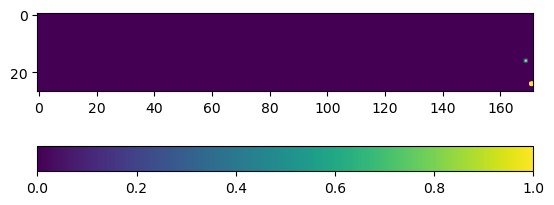

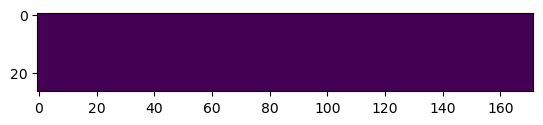

In [100]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(np.array(transcriptome_counts), vmin=0, vmax=1)
plt.colorbar(orientation='horizontal')
plt.figure()
plt.imshow(np.array(rtRNA_counts), vmin=0, vmax=1)
#plt.colorbar()

In [101]:
# save
import time
final_probe_filename = os.path.join(library_folder,
    f"{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_24edits_probes.xlsx")
print(f"saving final probes to file: {final_probe_filename}")
final_probe_df.to_excel(final_probe_filename, index=None)

saving final probes to file: /lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/Edits_MERFISHmax/2023_12_14_24edits_noprimer_probes.xlsx
